# Animal Faces Classifier

## Project Overview

This project aims to develop an animal face classification system using deep learning and transfer learning. The system will be able to distinguish between three types of animals: cats, dogs, and wild animals based on their facial images. By using deep learning and transfer learning techniques, this project will achieve a high level of accuracy in recognizing and classifying these animals.

The objectives of this project are as follows:

* Build a classification model that can recognize and distinguish images of cat, dog, and wild animal faces with high accuracy.
* Apply deep learning and transfer learning techniques to leverage existing knowledge from pre-trained models.
* Develop a system that can be integrated into other applications or platforms for practical use.

This dataset, also known as Animal Faces-HQ (AFHQ), consists of 16,130 high-quality images with a resolution of 512×512.
There are three class domains, each providing around 5,000 images. By having multiple (three) domains and diverse images from various breeds within each domain, AFHQ presents a challenging image-to-image translation problem. The classes are:

* Cat
* Dog
* Wildlife

## IMPORT DATA & MODULE

### Load data menggunakan API KAGGLE

In [ ]:
# C:\Users\USER\.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"syahmisajid12","key":"a76cee502ebc4268b9b384c1c587dfe1"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


#### Load Data dari Kaggle

In [ ]:
!kaggle datasets download -d andrewmvd/animal-faces

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/animal-faces
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
... resuming from 62914560 bytes (666786195 bytes left) ...
100% 693M/696M [00:32<00:00, 27.4MB/s]
100% 696M/696M [00:32<00:00, 20.7MB/s]


In [ ]:
pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtype

In [ ]:
# print(tf.keras.__version__)

#### Import Module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Function

In [ ]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir, view_random_images,pred_and_plot, load_and_prep_image

--2025-01-16 18:31:26--  https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11485 (11K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  11.22K  --.-KB/s    in 0.001s  

2025-01-16 18:31:26 (8.28 MB/s) - ‘helper_functions.py.2’ saved [11485/11485]



## EXPLORATORY DATA ANALYSIS

In [ ]:
unzip_data("/content/animal-faces.zip")

In [ ]:
walk_through_dir("/content/afhq")

There are 2 directories and 0 images in '/content/afhq'.
There are 3 directories and 0 images in '/content/afhq/train'.
There are 0 directories and 4738 images in '/content/afhq/train/wild'.
There are 0 directories and 5153 images in '/content/afhq/train/cat'.
There are 0 directories and 4739 images in '/content/afhq/train/dog'.
There are 3 directories and 0 images in '/content/afhq/val'.
There are 0 directories and 500 images in '/content/afhq/val/wild'.
There are 0 directories and 500 images in '/content/afhq/val/cat'.
There are 0 directories and 500 images in '/content/afhq/val/dog'.


### Proportion of Number of Each Class

In [ ]:
import os
from PIL import Image

def count_images_in_folder(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif']  # Ekstensi file gambar yang akan dihitung

    count = 0

    for file_name in os.listdir(folder_path):
        if any(ext in file_name.lower() for ext in image_extensions):
            file_path = os.path.join(folder_path, file_name)
            try:
                Image.open(file_path)
                count += 1
            except:
                pass  # Skip file yang tidak dapat dibuka sebagai gambar

    return count

In [ ]:
# Contoh penggunaan
cat_path = "/content/afhq/train/cat"
cat_count = count_images_in_folder(cat_path)
print("Jumlah gambar di folder {}: {}".format(cat_path, cat_count))

# Contoh penggunaan
dog_path = "/content/afhq/train/dog"
dog_count = count_images_in_folder(dog_path)
print("Jumlah gambar di folder {}: {}".format(dog_path, dog_count))

# Contoh penggunaan
wild_path = "/content/afhq/train/wild"
wild_count = count_images_in_folder(wild_path)
print("Jumlah gambar di folder {}: {}".format(wild_path, wild_count))

Jumlah_train = [cat_count, dog_count, wild_count]
print(Jumlah_train)
label = ["cat", "dog", "wild"]

Jumlah gambar di folder /content/afhq/train/cat: 5153
Jumlah gambar di folder /content/afhq/train/dog: 4739
Jumlah gambar di folder /content/afhq/train/wild: 4738
[5153, 4739, 4738]


In [ ]:
# Contoh penggunaan
cat_path_test = "/content/afhq/val/cat"
cat_count_test = count_images_in_folder(cat_path_test)
print("Jumlah gambar di folder {}: {}".format(cat_path_test, cat_count_test))

# Contoh penggunaan
dog_path_test = "/content/afhq/val/dog"
dog_count_test = count_images_in_folder(dog_path_test)
print("Jumlah gambar di folder {}: {}".format(dog_path_test, dog_count_test))

# Contoh penggunaan
wild_path_test = "/content/afhq/val/wild"
wild_count_test = count_images_in_folder(wild_path_test)
print("Jumlah gambar di folder {}: {}".format(wild_path_test, wild_count_test))

Jumlah_test = [cat_count_test, dog_count_test, wild_count_test]
print(Jumlah_test)
label = ["cat", "dog", "wild"]

Jumlah gambar di folder /content/afhq/val/cat: 500
Jumlah gambar di folder /content/afhq/val/dog: 500
Jumlah gambar di folder /content/afhq/val/wild: 500
[500, 500, 500]


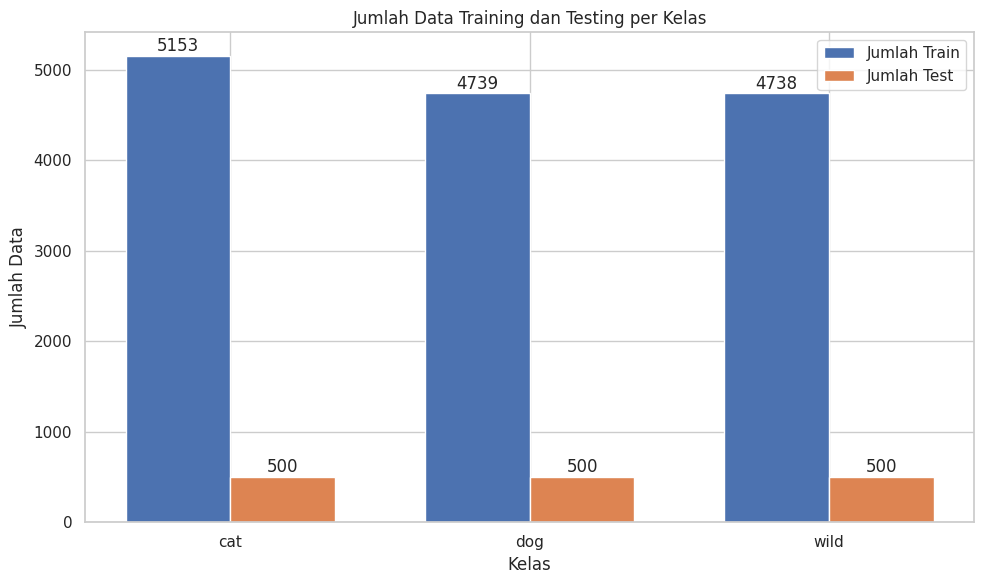

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

width = 0.35  # Lebar batang

# Membuat plot menggunakan seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot untuk Jumlah_train
train_bar = np.arange(len(label))
train_plot = plt.bar(train_bar, Jumlah_train, width, label='Jumlah Train')

# Plot untuk Jumlah_test
test_bar = train_bar + width
test_plot = plt.bar(test_bar, Jumlah_test, width, label='Jumlah Test')

# Menambahkan label pada sumbu x dan sumbu y
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')

# Menambahkan label pada setiap batang
for i in range(len(label)):
    plt.text(train_bar[i], Jumlah_train[i] + 50, str(Jumlah_train[i]), ha='center')
    plt.text(test_bar[i], Jumlah_test[i] + 50, str(Jumlah_test[i]), ha='center')

# Menambahkan judul dan legend
plt.title('Jumlah Data Training dan Testing per Kelas')
plt.legend()

# Menandai posisi kelas pada sumbu x
plt.xticks(train_bar + width/2, label)

plt.tight_layout()
plt.show()

Perbandingan Data Train dan Data Test = 90% / 10%

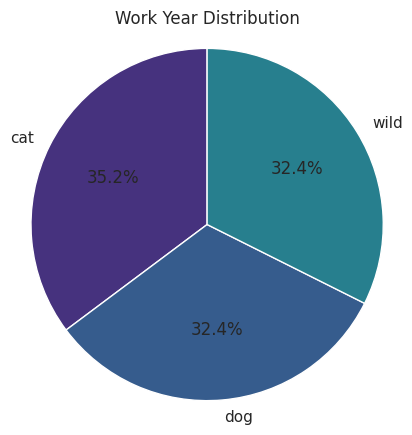

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(Jumlah_train, labels=label, autopct='%1.1f%%',
        colors=sns.color_palette('viridis'), startangle=90)
plt.title('Work Year Distribution')
plt.axis('equal')
plt.show()


Proporsi Masing masing class cukup seimbang

### Visualization Image Data

In [ ]:
train_dir = '/content/afhq/train/'

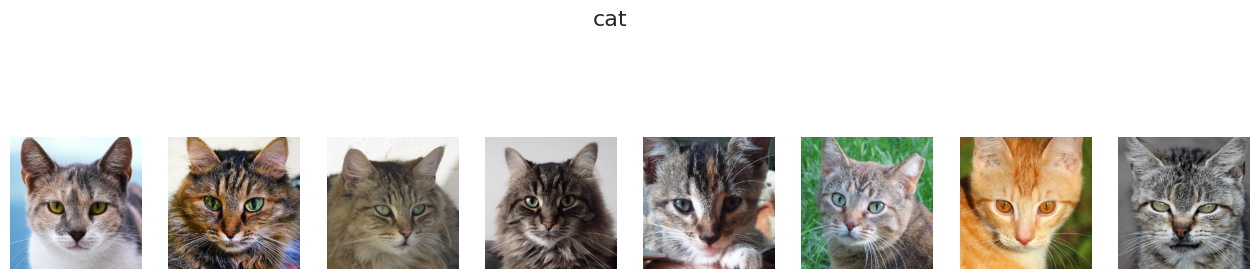

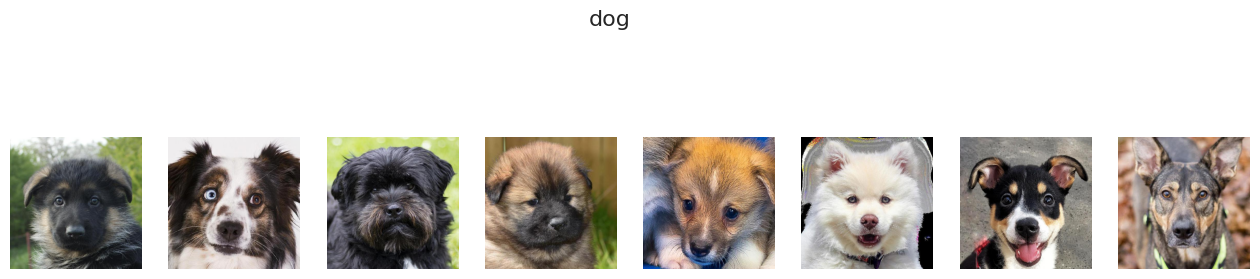

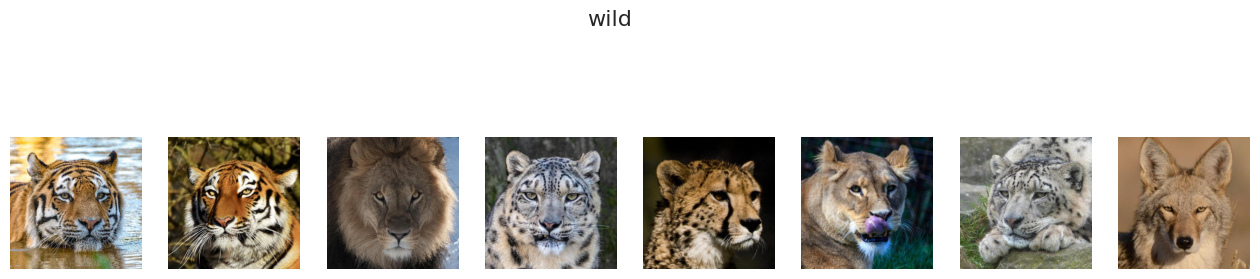

In [ ]:
# View a random image from the training dataset
cat = view_random_images(target_dir=train_dir,
                        target_class="cat",
                        num_images = 8)

dog = view_random_images(target_dir=train_dir,
                        target_class="dog",
                        num_images = 8)

wild = view_random_images(target_dir=train_dir,
                        target_class="wild",
                        num_images = 8)

## Data Pre Processing

### Data Augmentation

In [ ]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/afhq/train"
validation_dir = "/content/afhq/val"

train_datagen = ImageDataGenerator(rescale=1/255.)
validation_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
validation_data = validation_datagen.flow_from_directory(validation_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 14630 images belonging to 3 classes.
Testing images:
Found 1500 images belonging to 3 classes.


In [ ]:
len(train_data)

458

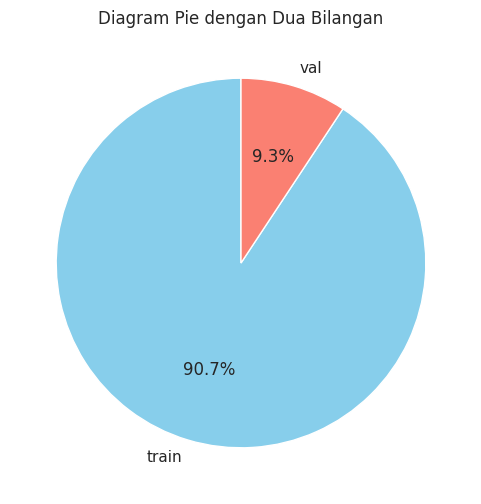

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['train', 'val']
values = [train_data.samples , validation_data.samples]
colors = ['skyblue', 'salmon']  # Warna yang berbeda untuk setiap bagian

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Diagram Pie dengan Dua Bilangan')
plt.show()


# Modelling

## Model 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

inputs = Input(shape=(224, 224, 3))

# x = Conv2D(16, 3, activation='relu')(inputs)
# x = Conv2D(16, 3, activation='relu')(x)
# x = MaxPool2D()(x)

x = Conv2D(32, 3, activation='relu')(inputs)
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPool2D()(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)

model_0 = Model(inputs=inputs, outputs=outputs)

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_0 = model_0.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        # validation_steps=len(validation_data)
                        )

Epoch 1/10
458/458 [==============================] - 69s 133ms/step - loss: 0.5019 - accuracy: 0.8355 - val_loss: 0.2366 - val_accuracy: 0.9180
Epoch 2/10
458/458 [==============================] - 62s 135ms/step - loss: 0.1395 - accuracy: 0.9509 - val_loss: 0.2403 - val_accuracy: 0.9187
Epoch 3/10
458/458 [==============================] - 58s 128ms/step - loss: 0.0691 - accuracy: 0.9769 - val_loss: 0.2029 - val_accuracy: 0.9280
Epoch 4/10
458/458 [==============================] - 62s 135ms/step - loss: 0.0404 - accuracy: 0.9862 - val_loss: 0.2062 - val_accuracy: 0.9387
Epoch 5/10
458/458 [==============================] - 58s 126ms/step - loss: 0.0353 - accuracy: 0.9876 - val_loss: 0.2467 - val_accuracy: 0.9260
Epoch 6/10
458/458 [==============================] - 62s 135ms/step - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.2541 - val_accuracy: 0.9260
Epoch 7/10
458/458 [==============================] - 64s 139ms/step - loss: 0.0245 - accuracy: 0.9912 - val_loss: 0.3381 - val_ac

In [ ]:
baseModel_result = model_0.evaluate(validation_data)

47/47 [==============================] - 5s 110ms/step - loss: 0.3057 - accuracy: 0.9213


In [ ]:
# Menyimpan model dalam format .h5
output_filename = 'basemodel.h5'
model_0.save(output_filename)

from google.colab import files
files.download(output_filename)

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(f"Train data: {len(train_data)}, Validation data: {len(validation_data)}")
print(f"Train batch size: {train_data.batch_size}, Validation batch size: {validation_data.batch_size}")

Train data: 458, Validation data: 47
Train batch size: 32, Validation batch size: 32


In [ ]:
print(f"Train data: {len(train_data)}, Validation data: {len(validation_data)}")
print(f"Train batch size: {train_data.batch_size}, Validation batch size: {validation_data.batch_size}")

Train data: 458, Validation data: 47
Train batch size: 32, Validation batch size: 32


In [ ]:
print({key: len(value) for key, value in history_0.history.items()})

{'loss': 10, 'accuracy': 10, 'val_loss': 10, 'val_accuracy': 10}


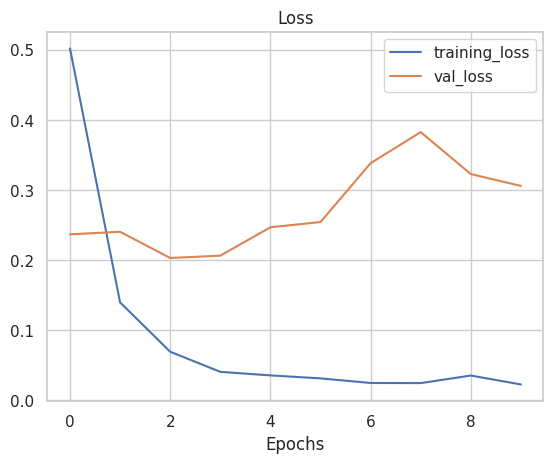

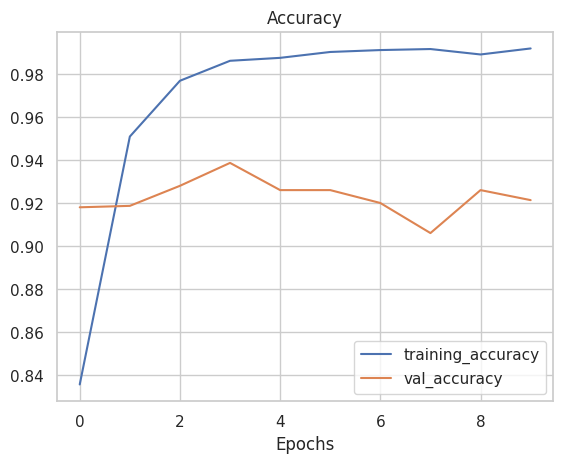

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_0)

## Model 1 (Transfer Learning)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)

TensorFlow version: 2.15.0
TensorFlow Hub version: 0.16.1


In [ ]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model


In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

### Resnet

In [ ]:
# Create model
resnet_model = create_model(resnet_url, num_classes=train_data.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=validation_data,
                                  validation_steps=len(validation_data),
                                  callbacks=[early_stopping]
                                  )

Epoch 1/10
458/458 [==============================] - 76s 147ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0132 - val_accuracy: 0.9953
Epoch 2/10
458/458 [==============================] - 64s 140ms/step - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.0107 - val_accuracy: 0.9967
Epoch 3/10
458/458 [==============================] - 67s 146ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0099 - val_accuracy: 0.9987
Epoch 4/10
458/458 [==============================] - 60s 130ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0089 - val_accuracy: 0.9987
Epoch 5/10
458/458 [==============================] - 55s 120ms/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 0.0089 - val_accuracy: 0.9980
Epoch 6/10
458/458 [==============================] - 54s 118ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0120 - val_accuracy: 0.9967
Epoch 7/10
458/458 [==============================] - 55s 119ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0109 - val_ac

In [ ]:
# Menyimpan model dalam format .h5
output_filename = 'resnet_finetuned.h5'
resnet_model.save(output_filename)

from google.colab import files
files.download(output_filename)

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model

# Memuat model dari file .h5
model = load_model('resnet_finetuned.h5', custom_objects={'KerasLayer': hub.KerasLayer})

In [ ]:
resnet_result = resnet_model.evaluate(validation_data)

47/47 [==============================] - 5s 103ms/step - loss: 0.0089 - accuracy: 0.9980


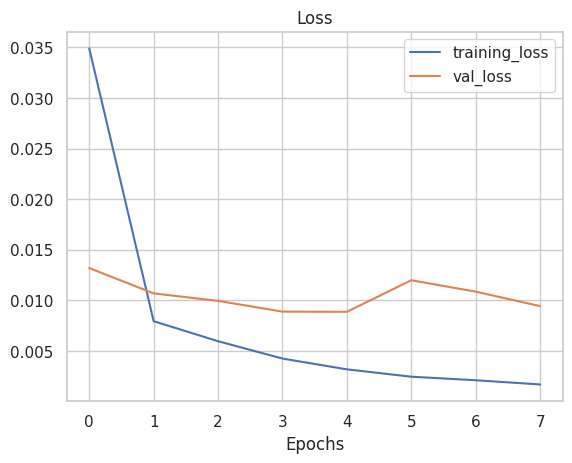

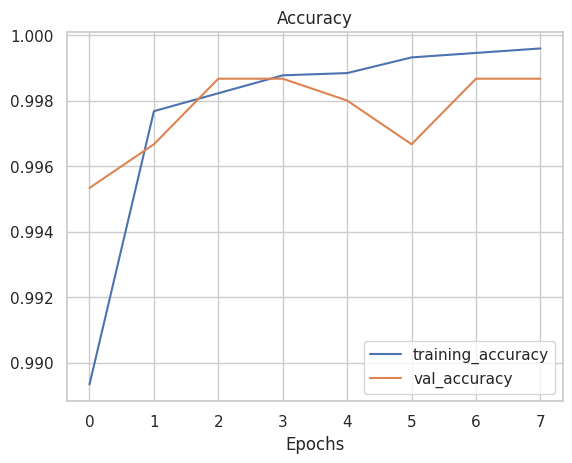

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(resnet_history)

### efficientnet

In [ ]:
# Create model
efficientnet_model = create_model(efficientnet_url, num_classes=train_data.num_classes)

# Compile
efficientnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)
# Fit the model
efficientnet_history = efficientnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=validation_data,
                                  validation_steps=len(validation_data),
                                  callbacks=[early_stopping]
                                  )

Epoch 1/10
458/458 [==============================] - 73s 133ms/step - loss: 0.0567 - accuracy: 0.9887 - val_loss: 0.0133 - val_accuracy: 0.9987
Epoch 2/10
458/458 [==============================] - 47s 102ms/step - loss: 0.0092 - accuracy: 0.9979 - val_loss: 0.0090 - val_accuracy: 0.9993
Epoch 3/10
458/458 [==============================] - 48s 105ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.0075 - val_accuracy: 0.9993
Epoch 4/10
458/458 [==============================] - 51s 111ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0076 - val_accuracy: 0.9993
Epoch 5/10
458/458 [==============================] - 49s 108ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0070 - val_accuracy: 0.9993
Epoch 6/10
458/458 [==============================] - 50s 108ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0071 - val_accuracy: 0.9993
Epoch 7/10
458/458 [==============================] - 49s 106ms/step - loss: 0.0029 - accuracy: 0.9989 - val_loss: 0.0069 - val_ac

In [ ]:
# Menyimpan model dalam format .h5
output_filename = 'efficientnet_finetuned.h5'
efficientnet_model.save(output_filename)

from google.colab import files
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
efficientnet_result = efficientnet_model.evaluate(validation_data)

47/47 [==============================] - 4s 91ms/step - loss: 0.0072 - accuracy: 0.9993


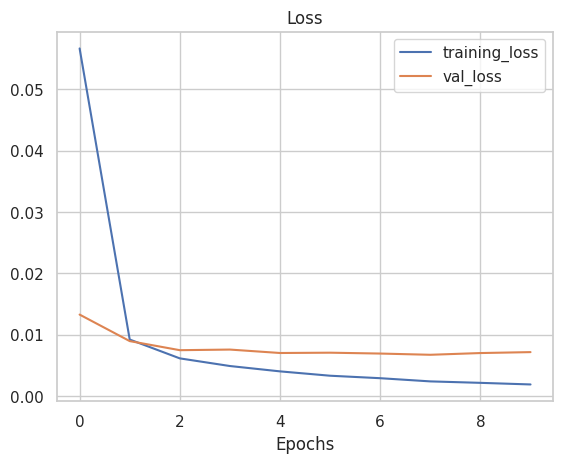

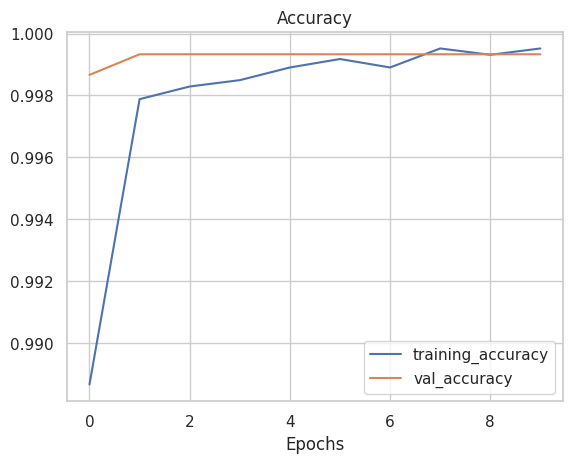

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(efficientnet_history)

# Evaluation

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("/content/afhq/train") # turn our training path into a Python path
# class_names = np.array([item.name for item in data_dir.glob('*')]) # created a list of class_names from the subdirectories
class_names = np.array([item.name for item in sorted(data_dir.glob('*'))]) # created a list of class_names from the subdirectories
class_names

array(['cat', 'dog', 'wild'], dtype='<U4')

In [ ]:
print(f"Akurasi Base Model = {round(baseModel_result[1],4)}")
print(f"Akurasi Resnet = {round(resnet_result[1],4)}")
print(f"Akurasi Efficientnet ={round(efficientnet_result[1],4)}")

Akurasi Base Model = 0.9213
Akurasi Resnet = 0.998
Akurasi Efficientnet =0.9993


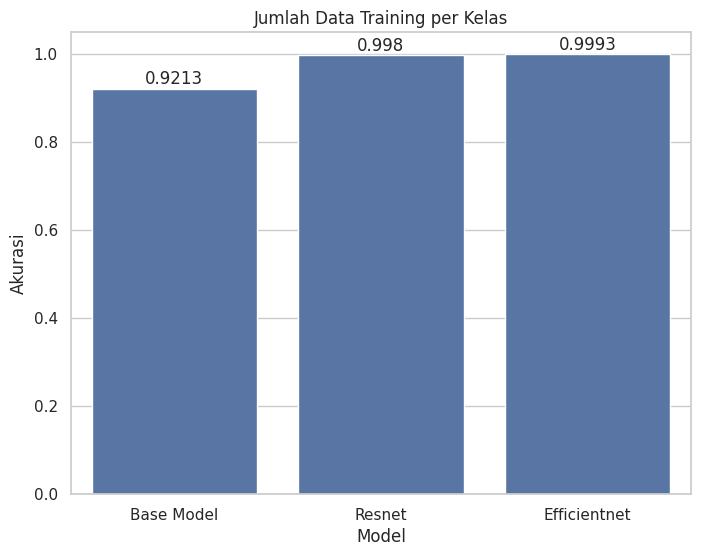

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

akurasi = [round(baseModel_result[1],4), round(resnet_result[1],4), round(efficientnet_result[1],4)]
model = ["Base Model", "Resnet", "Efficientnet"]

# Membuat plot menggunakan seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=model, y=akurasi)
plt.title('Jumlah Data Training per Kelas')
plt.xlabel('Model')
plt.ylabel('Akurasi')

# Menambahkan keterangan nilai akurasi pada setiap batang
for i in range(len(akurasi)):
    plt.text(i, akurasi[i] + 0.01, str(akurasi[i]), ha='center')

plt.show()

1/1 [==============================] - 1s 1s/step


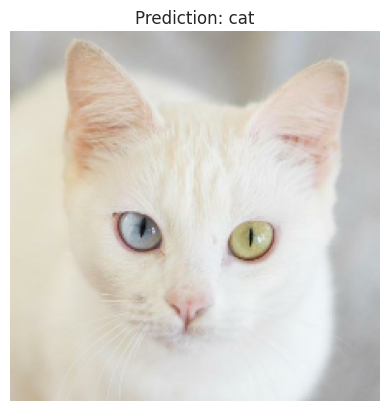

In [ ]:
pred_and_plot(model=resnet_model,
              filename="/content/afhq/val/cat/flickr_cat_000016.jpg",
              class_names=class_names)